In [43]:
library(readxl)
library(data.table)
library(ggplot2)
library(ggprism)
library(ggforce)
library(ggetho)
library(ggsignif)
source("R/plot.R")
source("R/Cbind.R")

In [44]:
data <- data.table::fread(file = "tidy_data_wide.csv")
sheets <- c("20min STM", "1hr STM", "3hr STM")
experiments <- c("20min STM", "1hr STM", "3hr STM")
genotypes <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")
data<-data[experiment %in% experiments,]
data$experiment <- factor(data$experiment, levels=experiments)
wts <- c("Iso31", "MB010B.(II)SPARC-Chrimson ISO", "MB010B.(II)SPARC-GFP ISO")



In [45]:
# panel2_data <- data[experiment != "20min STM" | User == "CH",]
panel2_data <- data

In [46]:
panel2_data_long <- melt(panel2_data, measure.vars = c("PRE", "POST"), value.name = "PI", variable.name = "test")

In [47]:
A <- panel2_data[experiment=="20min STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
B <- panel2_data[experiment=="1hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
C <- panel2_data[experiment=="3hr STM" & Genotype %in% wts, .(idoc_folder, ROI, Genotype, experiment, PRE, POST)]
Ad <- A[, (delta = POST-PRE)]
Bd <- B[, (delta = POST-PRE)]
Cd <- C[, (delta = POST-PRE)]

In [48]:
data.table::fwrite(x = A, file="prism/Fig2/Figure_2_20min STM.csv", quote=TRUE)
data.table::fwrite(x = B, file="prism/Fig2/Figure_2_1hr STM.csv", quote=TRUE)
data.table::fwrite(x = C, file="prism/Fig2/Figure_2_3hr STM.csv", quote=TRUE)
x<-Cbind(Ad, Bd, Cd)
colnames(x) <- c("20min STM", "1hr STM", "3hr STM")
data.table::fwrite(x =x, file="prism/Fig2/Figure_2_boxplot.csv")

In [49]:
panel2_data[, .N, by=Genotype]

Genotype,N
<chr>,<int>
MB010B.(II)SPARC-Chrimson ISO,56
MB010B.(II)SPARC-GFP ISO,31
orb2,15
Iso31,114
dnc,3


[1] -1.02  0.70
[1] 0.5


Warning message in geom_signif(data = annotation_df, aes(annotations = stars), xmin = 1, :
“Ignoring unknown aesthetics: annotations”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3

$direction
[1] "horizontal"

$annotation
     group__ y_position annotations stars   N test          PI   PI_median
1: 20min STM        0.5     < 0.001   *** 128  PRE  0.02517554  0.03650000
2: 20min STM        0.5     < 0.001   *** 128 POST -0.23740476 -0.23611111
3:   1hr STM        0.5     < 0.001   ***  22  PRE -0.02015434  0.00000000
4:   1hr STM        0.5     < 0.001   ***  22 POST -0.32580195 -0.27608333
5:   3hr STM        0.5      0.0028   ***  51  PRE  0.01235181  0.00000000
6:   3hr STM        0.5      0.0028   ***  51 POST -0.08941799 -0.07142857
       PI_std   std_error x
1: 0.08522364 0.007532776 1
2: 0.29832253 0.026368235 2
3: 0.08447959 0.018011110 1
4: 0.29923224 0.063796528 2
5: 0.08385194 0.011741620 1
6: 0.25064295 0.035097033 2


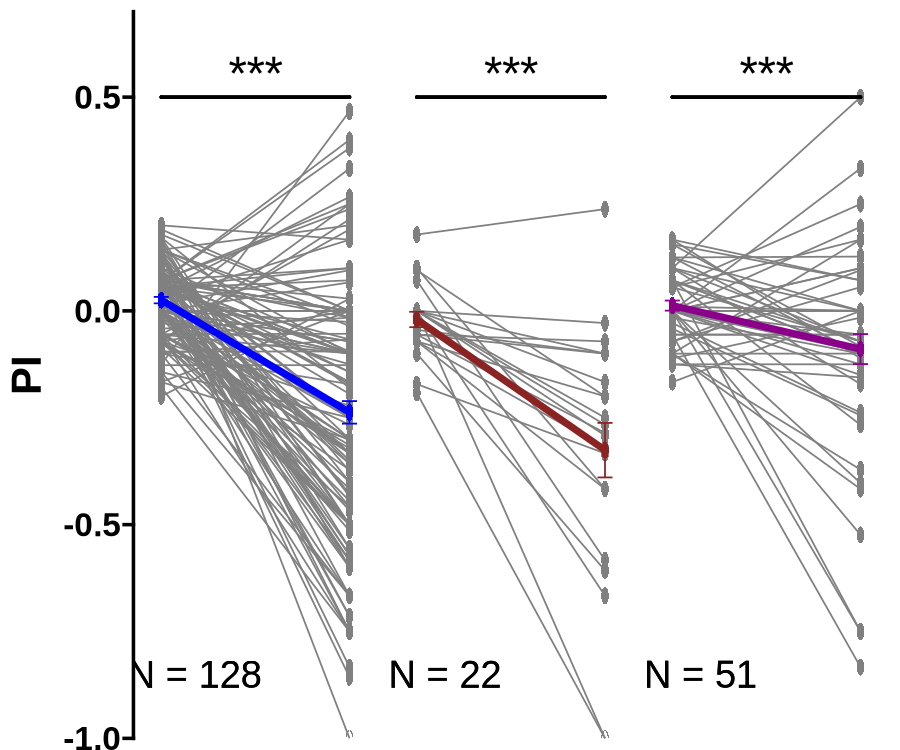

In [50]:
ratio=2.5
size_unit=2.5
panel2A <- learning_plot(
    panel2_data_long[Genotype%in%wts,], "experiment", "horizontal", y_limits=y_limits_panel2,
    colors=colors_panel2[1:length(experiments)], test=paired_t_test,
    map_signif_level=TRUE,
    starsize=10, textsize=8,
    hjust_text=0.25,
    y_annotation=0.5
)
save_learning_plot(plot = panel2A, filename = "prism/Fig2/panel2A.svg", ratio=ratio, size_unit=size_unit)
options(repr.plot.height=size_unit*ratio, repr.plot.width=size_unit*panel2A$n_facets)
panel2A

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


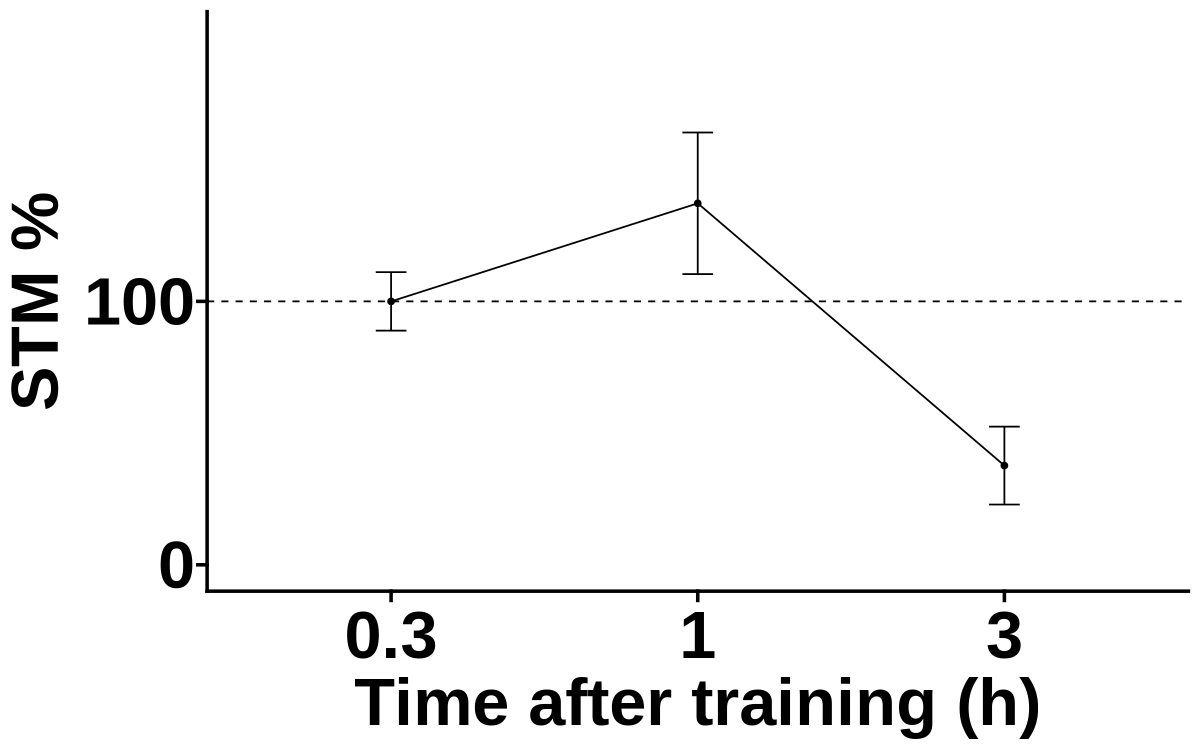

In [83]:
options(repr.plot.width=10)
ref_pi <- panel2A$annotation[test=="POST" & group__ == "20min STM", PI]
ggplot(data=panel2A$annotation[test=="POST", .(group__, norm_PI=PI / ref_pi, std_error)], aes(x=group__, y=norm_PI, group=1)) +
  geom_line() +
  geom_point() +
  geom_errorbar(aes(x=group__, ymin=norm_PI - std_error / ref_pi, ymax=norm_PI + std_error / ref_pi), width=.1) +
  scale_x_discrete(labels=c(0.3, 1, 3), name="Time after training (h)") +
  scale_y_continuous(limits=c(0, 2), breaks=c(0, 1), labels=c(0, 100), name="STM %") + geom_hline(yintercept=1, linetype="dashed")

In [74]:
panel2_data_long[Genotype%in%wts & test == "POST", mean(PI), by=experiment]

experiment,V1
<fct>,<dbl>
20min STM,-0.23740476
3hr STM,-0.08941799
1hr STM,-0.32580195


Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Invalid .internal.selfref detected and fixed by taking a (shallow) copy of the data.table so that := can add this new column by reference. At an earlier point, this data.table has been copied by R (or was created manually using structure() or similar). Avoid names<- and attr<- which in R currently (and oddly) may copy the whole data.table. Use set* syntax instead to avoid copying: ?set, ?setnames and ?setattr. If this message doesn't help, please report your use case to the data.table issue tracker so the root cause can be fixed or this message improved.”
Warning message in `[.data.table`(data, , `:=`(test__, NULL)):
“Column 'test__' does not exist to remove”


[1] "Outliers: "
     id   group__         PRE       POST         dPI outlier
 1:   3 20min STM  0.00000000  0.3330000  0.33300000    TRUE
 2:  24 20min STM  0.07150000 -0.8335000 -0.90500000    TRUE
 3:  57 20min STM  0.12700000 -0.7500000 -0.87700000    TRUE
 4:  66 20min STM  0.06950000  0.4000000  0.33050000    TRUE
 5:  67 20min STM  0.05550000 -0.8570000 -0.91250000    TRUE
 6: 155 20min STM  0.14300000 -1.0000000 -1.14300000    TRUE
 7: 162 20min STM -0.07150000  0.2500000  0.32150000    TRUE
 8: 342   3hr STM  0.10000000  0.5000000  0.40000000    TRUE
 9: 347   3hr STM  0.00000000  0.3333333  0.33333333    TRUE
10: 380 20min STM -0.12500000  0.4666667  0.59166667    TRUE
11: 391   3hr STM  0.07142857 -0.7500000 -0.82142857    TRUE
12: 394   3hr STM -0.05555556 -0.8333333 -0.77777778    TRUE
13: 402   1hr STM  0.00000000 -1.0000000 -1.00000000    TRUE
14: 441   1hr STM  0.17857143  0.2380952  0.05952381    TRUE


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


$gg

$n_facets
[1] 3


Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”


png 
  2

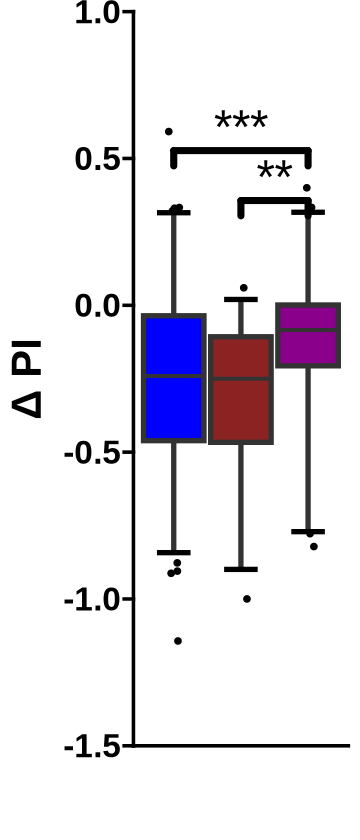

In [36]:
ratio=7
size_unit=1
panel2B <- summary_plot(
    data=panel2_data_long,
    group = "experiment", 
    comparisons = list(
        c("20min STM", "3hr STM"),
        c("1hr STM", "3hr STM")
    ),
    map_signif_level=T,
    annotation_y=c(0.44, .27),
    test=unpaired_t_test,
    colors=colors_panel2[1:length(experiments)],
    x_labels_angle=45,
    y_limits=c(-1.5, 1),
    starsize=10,
    text_y_size=20,
    title_y_size=25,
    percentile=c(0.025, 0.975)
)
panel2B$gg <- panel2B$gg + theme(
    axis.text.x=element_blank(),
    axis.ticks.x=element_blank()
)
options(repr.plot.width=panel2B$n_facets*size_unit, repr.plot.height=size_unit*ratio )
panel2B
save_summ_plot(plot=panel2B, filename = "prism/Fig2/panel2B.svg", size_unit=size_unit, ratio=ratio)

Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.text.align` theme element is not defined in the element hierarchy.”
Warning message in plot_theme(plot):
“The `legend.title.align` theme element is not defined in the element hierarchy.”
Warning message in grid.Call(C_textBounds, as.graphi

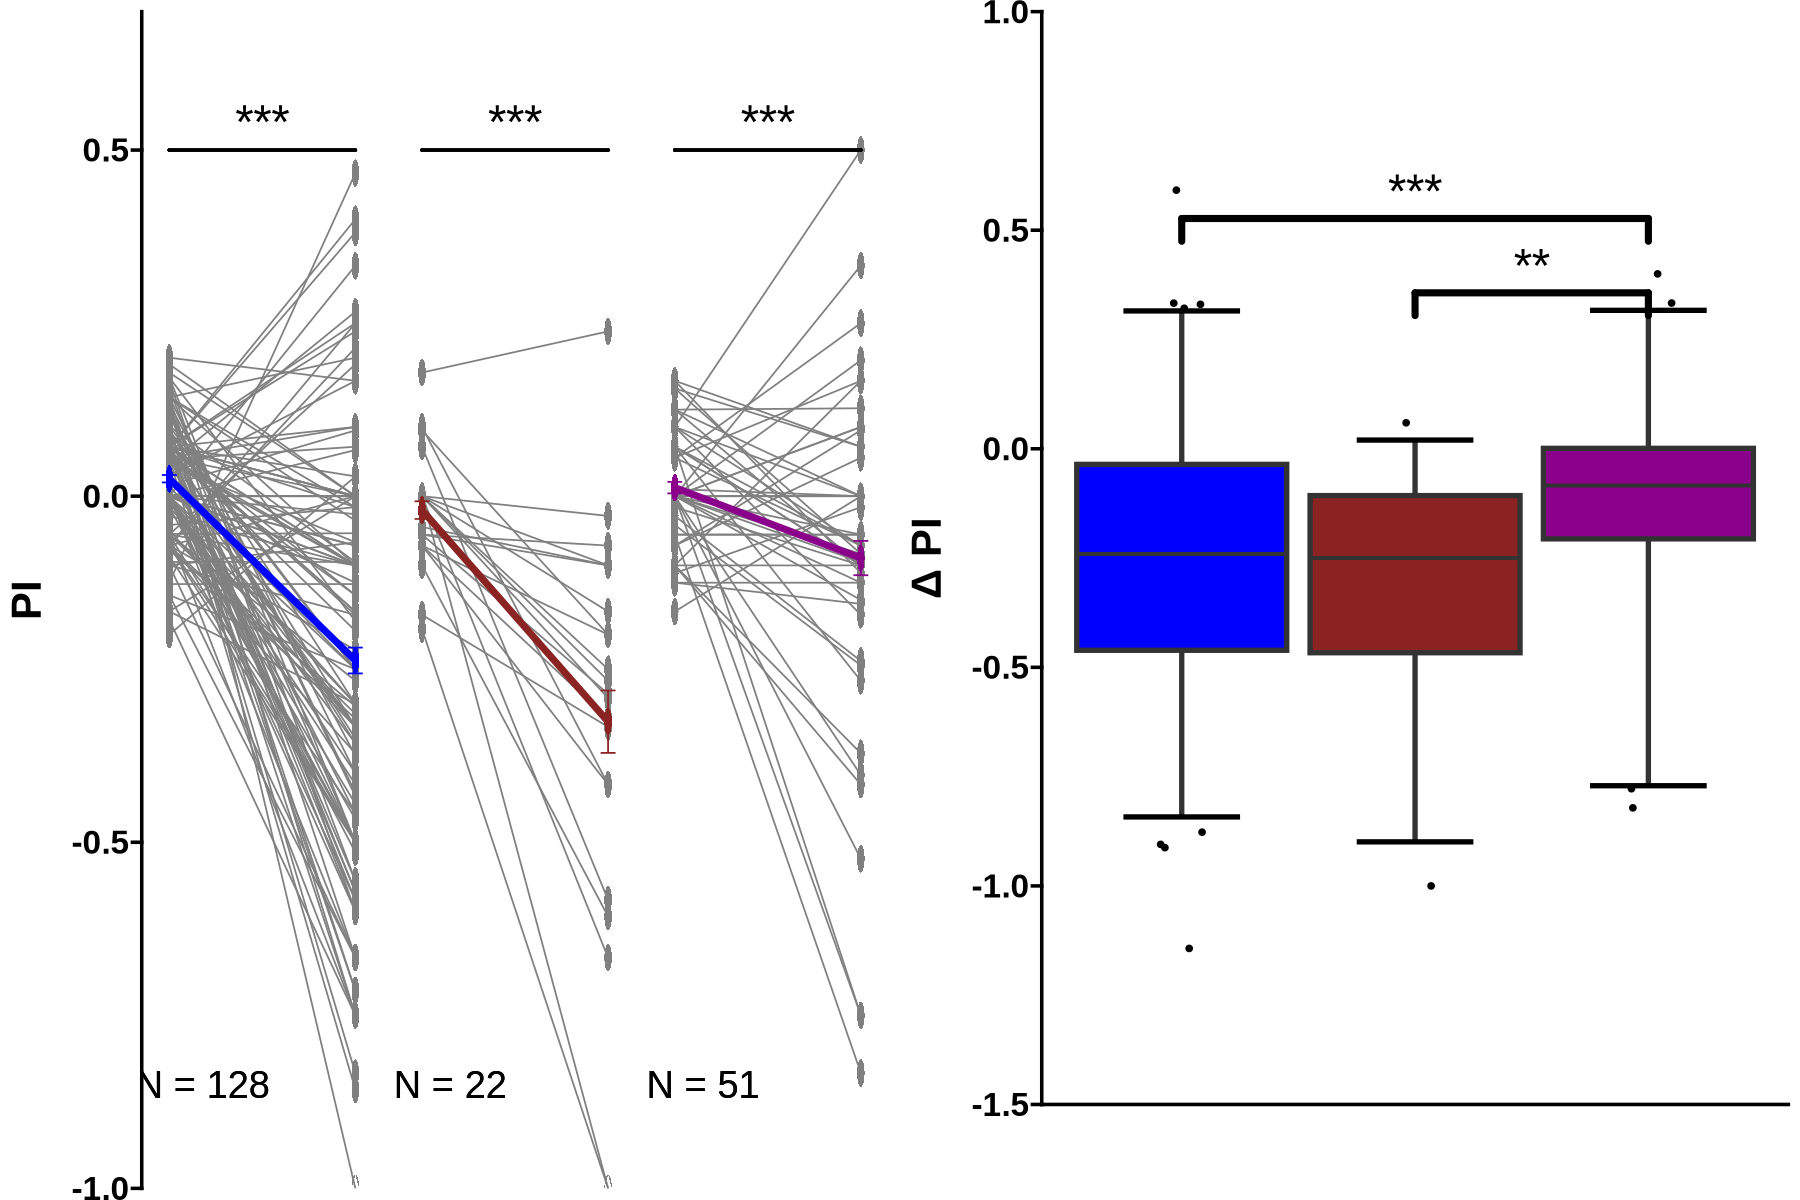

In [37]:
options(repr.plot.width=15)
options(repr.plot.height=10)
gg <- cowplot::plot_grid(panel2A$gg, panel2B$gg, ncol=2)
ggsave(plot = gg, filename = "figures/Figure_2.pdf", width=options()$repr.plot.width, height=options()$repr.plot.height)
gg